## Exploratory Data Analysis: Amazon Pet Products reviews

In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('ggplot')
import os
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [2]:
os.chdir("/mnt/c/Users/diego/OneDrive/Documentos/Data science projects/nlp 2/petsentiment_analysis")

In [3]:
data = pd.read_csv("data/raw/balanced_data.csv")
data.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,True
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,True
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,True
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,True
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,True


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302400 entries, 0 to 302399
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             302400 non-null  float64
 1   title              302400 non-null  object 
 2   text               302400 non-null  object 
 3   asin               302400 non-null  object 
 4   parent_asin        302400 non-null  object 
 5   user_id            302400 non-null  object 
 6   timestamp          302400 non-null  object 
 7   helpful_vote       302400 non-null  int64  
 8   verified_purchase  302400 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 18.7+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,302400.0,2.999815,1.414204,1.0,2.0,3.0,4.0,5.0
helpful_vote,302400.0,0.414220,1.851932,0.0,0.0,0.0,0.0,466.0


In [6]:
data.describe(include = object).T

,count,unique,top,freq
title,302400,206884,Disappointed,915
text,302400,294669,,1071
asin,302400,107443,B0BMBC1FJX,631
parent_asin,302400,63974,B0BMBC1FJX,631
user_id,302400,255604,AH7OPR5CWTXCRWYECY34T62KA2QA,63
timestamp,302400,299767,2023-01-08 21:50:14.135000+00:00,9


#### Check for the existence of null values and duplicates

In [7]:
print("Null values by column:")
print(data.isnull().sum())

Null values by column:
rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [8]:
print("Duplicate values:")
print(data.duplicated().sum())

Duplicate values:
2629


#### Remove duplicate values

In [9]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


#### Transform verified_purchase column to numbers


In [10]:
data["verified_purchase"] = data["verified_purchase"].map({True: 1, False: 0})

#### View the rating distribution

The dataset was previously balanced to achieve better results when training models.

/tmp/ipykernel_22411/598743582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data["rating"], palette = "inferno")


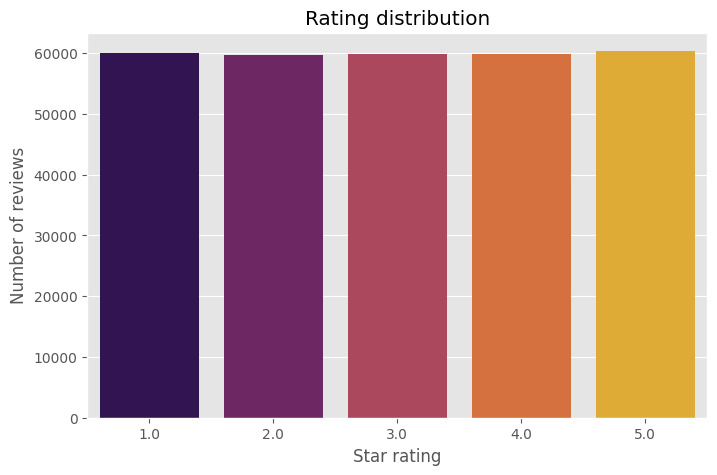

In [11]:
plt.figure(figsize = (8,5))
sns.countplot(x = data["rating"], palette = "inferno")
plt.title("Rating distribution")
plt.xlabel("Star rating")
plt.ylabel("Number of reviews")
plt.show()

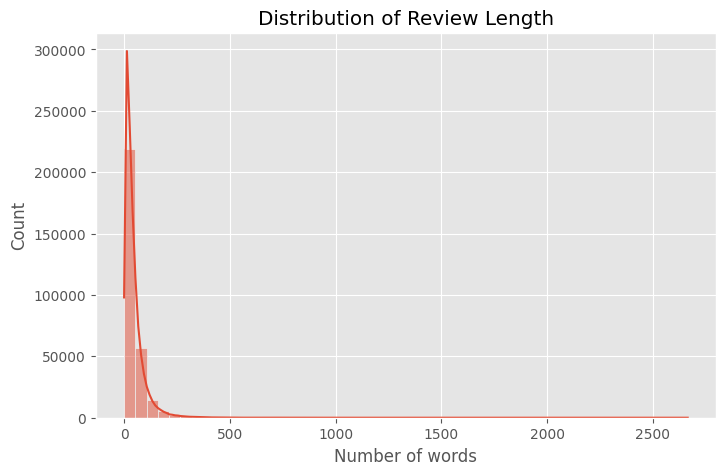

In [12]:
# Distribution of review length 

data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

# Distribución de la longitud de las reseñas
plt.figure(figsize=(8,5))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Distribution of Review Length")
plt.xlabel("Number of words")
plt.show()

#### Analysis of Helpful Votes

/tmp/ipykernel_22411/4100735549.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data["helpful_vote"], bins=30, kde=True , palette = "inferno")


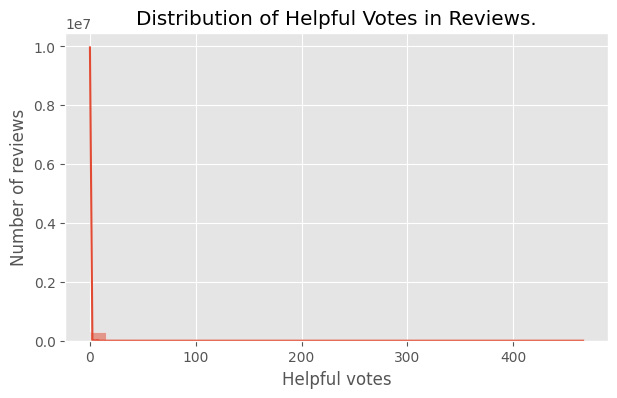

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(data["helpful_vote"], bins=30, kde=True , palette = "inferno")
plt.title("Distribution of Helpful Votes in Reviews.")
plt.xlabel("Helpful votes")
plt.ylabel("Number of reviews")
plt.show()

/tmp/ipykernel_22411/359809865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["rating"], y=data["helpful_vote"], palette="inferno")


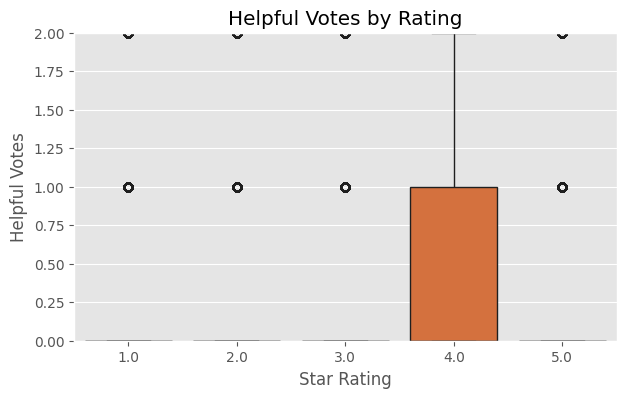

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x=data["rating"], y=data["helpful_vote"], palette="inferno")
plt.title("Helpful Votes by Rating")
plt.xlabel("Star Rating")
plt.ylabel("Helpful Votes")
plt.ylim(0, data["helpful_vote"].quantile(0.95)) 
plt.show()

#### Analysis of Verified Purchases

/tmp/ipykernel_22411/4253661383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["verified_purchase"], palette="Blues")


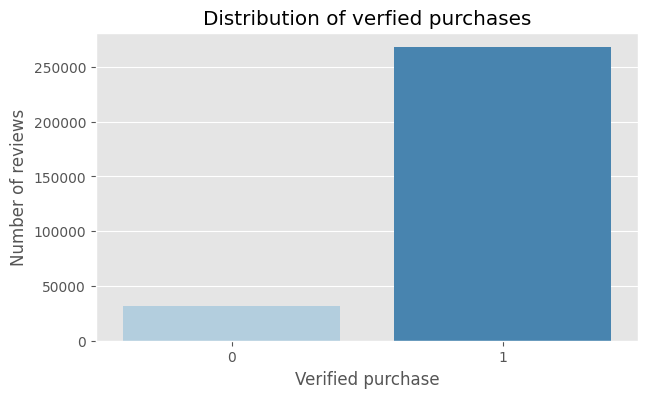

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x=data["verified_purchase"], palette="Blues")
plt.title("Distribution of verfied purchases")
plt.xlabel("Verified purchase")
plt.ylabel("Number of reviews")
plt.show()

/tmp/ipykernel_22411/1503880966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["verified_purchase"], y=data["rating"], palette="Blues")


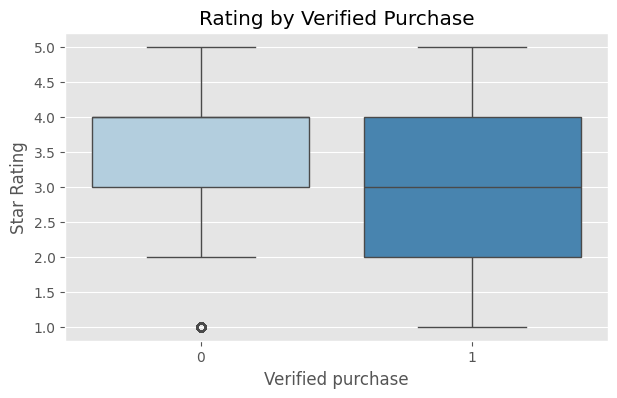

In [16]:
plt.figure(figsize=(7,4))
sns.boxplot(x=data["verified_purchase"], y=data["rating"], palette="Blues")
plt.title("Rating by Verified Purchase")
plt.xlabel("Verified purchase")
plt.ylabel("Star Rating")
plt.show()

/tmp/ipykernel_22411/772341127.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index("timestamp").resample("M").size().plot()


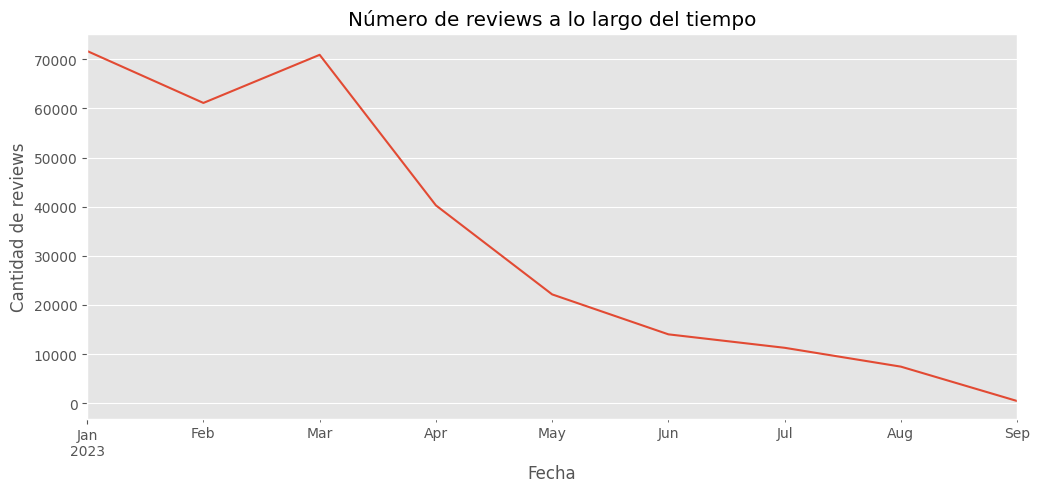

In [17]:
data["timestamp"] = pd.to_datetime(data["timestamp"], errors = "coerce")

# Visualizar la cantidad de reviews a lo largo del tiempo
plt.figure(figsize=(12,5))
data.set_index("timestamp").resample("M").size().plot()
plt.title("Número de reviews a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de reviews")
plt.show()

#### Text cleaning


In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
def cleaned_text(text):
    text = str(text).lower()  
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"[^a-zA-Z0-9\s']", "", text) 
    text = re.sub(r"\s+", " ", text).strip()  #
    
   
    words = text.split()  
    filtered_words = [word for word in words if word not in stop_words]  
    return " ".join(filtered_words)

data["processed_text"] = data["text"].apply(cleaned_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diegopy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Wordcloud


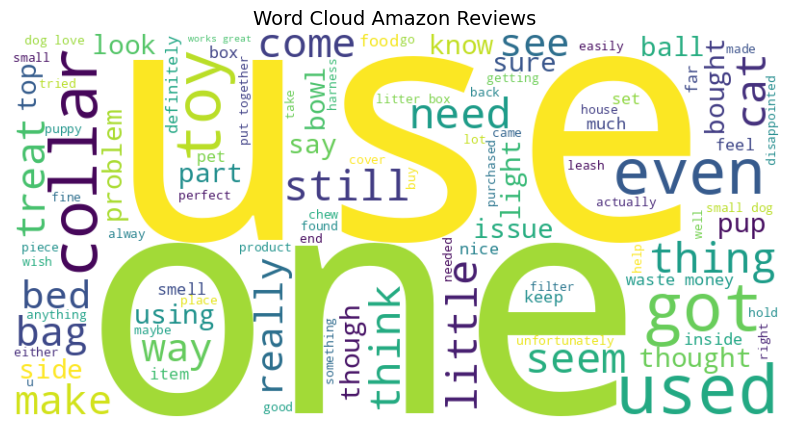

In [23]:

all_text = " ".join(str(review) for review in data["processed_text"])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width = 800, height = 400,
    background_color = "white",
    max_words = 100,
    stopwords = stopwords,
    colormap = "viridis"
).generate(all_text)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud Amazon Reviews", fontsize = 14)
plt.show()

#### Most frequent words


Top 10 Most Frequent Words:
       word  frequency
0       dog      90384
1       one      62418
2      like      58521
3     would      53024
4       cat      46145
5   product      41408
6       get      41123
7     great      38183
8      dogs      37958
9      good      35543
10      use      35095
11     well      31283
12     cats      30934
13    small      29880
14     time      27665
15   really      27390
16   little      26195
17     love      26051
18     even      25088
19     easy      24915


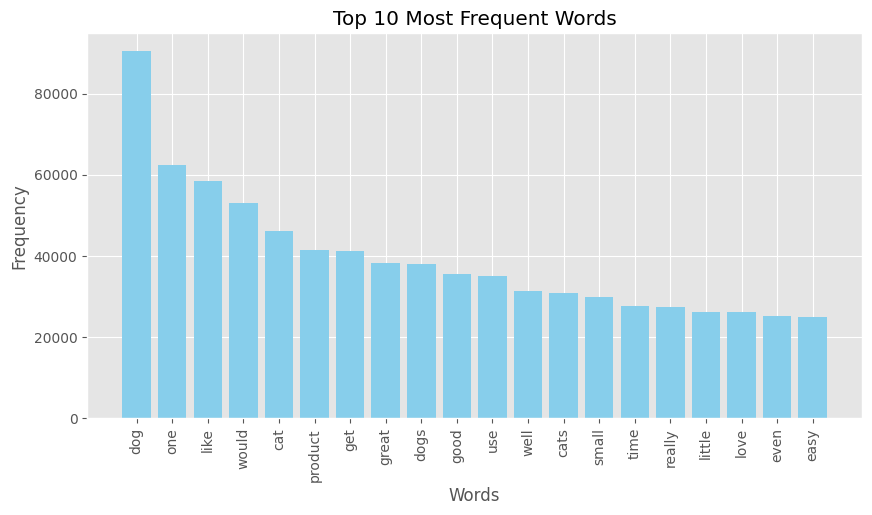

In [26]:
# Check if the DataFrame and the "text" column exist
if isinstance(data, pd.DataFrame) and "text" in data.columns:
    
    # Tokenize words and count frequencies
    word_counts = data["processed_text"].str.split().explode().value_counts().reset_index()
    word_counts.columns = ["word", "frequency"]

    # Get the 10 most frequent words after removing stopwords
    top_words = word_counts.head(20)

    # Display the words in a table before plotting
    print("\nTop 10 Most Frequent Words:")
    print(top_words)

    # Bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(top_words["word"], top_words["frequency"], color="skyblue")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 10 Most Frequent Words")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("The DataFrame is not defined or the 'text' column does not exist.")
